# <center> <u> Random Forest </u> </center>

In [1]:
import numpy as np
import pandas as pd 
from numba import jit, prange

import seaborn as sns 
import matplotlib.pyplot as plt 

## <center> Generate Synthetic Data </center> 

In [2]:
N = 100
P = np.linspace(0.01, 0.99, N)
defaults = np.zeros(N)

for i, p in enumerate(P):
    
    rv = np.random.uniform(0, 1)
    defaults[i] = [1 if rv < p else 0][0]

In [3]:
fico = np.linspace(800, 400, 100)

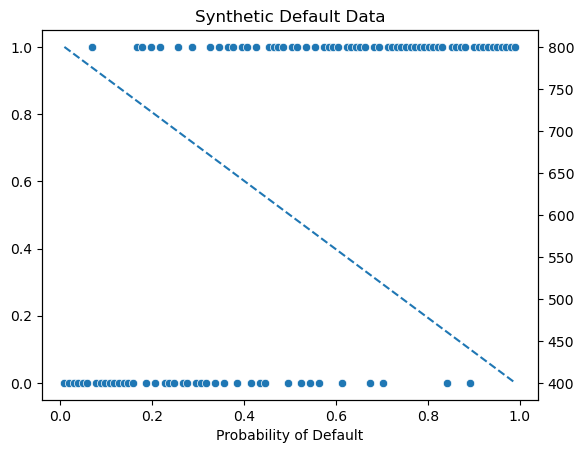

In [4]:
ax = sns.scatterplot(
    x = P,
    y = defaults,
)

plt.twinx()

sns.lineplot(
    x = P,
    y = fico,
    linestyle = "--",
)

ax.set(
    title = "Synthetic Default Data",
    xlabel = "Probability of Default",
)

plt.show()

In [5]:
df = pd.DataFrame()

df["default"] = defaults
df["fico"] = fico

In [6]:
display(df)

,default,fico
0,0.0,800.000000
1,0.0,795.959596
2,0.0,791.919192
3,0.0,787.878788
4,0.0,783.838384
...,...,...
95,1.0,416.161616
96,1.0,412.121212
97,1.0,408.080808
98,1.0,404.040404


## <center> Gini Impurity </center> 

## <center> $ p_{mk} = \frac{1}{N} \sum_{k=1}^{N} I(y = k) $ </center>

## <center> $ H(Q_{m}) = \sum_{k=1}^{N} p_{mk} \cdot (1 - p_{mk}) $ </center>

In [7]:
@jit(nopython = True)
def gini_index(p):
    """
    
    """
    
    return p * (1 - p)

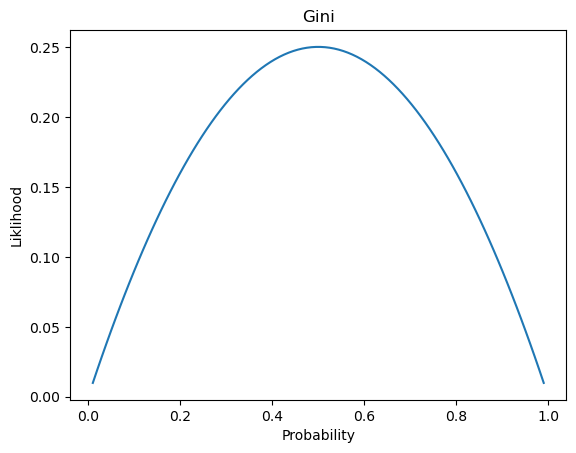

In [8]:
ax = sns.lineplot(
    x = P,
    y = gini_index(P)
)

ax.set(
    title = "Gini",
    xlabel = "Probability",
    ylabel = "Liklihood"
)

plt.show()

## <center> Bootstrap Aggregating </center> 

## <center> $ \hat{f} = \frac{1}{B} \sum_{i=1}^{B} f_{b}(x') $ </center>

In [9]:
bootstrap_count = 5
sample_count = 20

for i in range(bootstrap_count):
    samples = np.random.randint(0, 100, sample_count)
    print(df.iloc[samples].head())

    default        fico
72      1.0  509.090909
79      1.0  480.808081
14      0.0  743.434343
4       0.0  783.838384
35      0.0  658.585859
    default        fico
21      1.0  715.151515
32      1.0  670.707071
63      1.0  545.454545
53      1.0  585.858586
99      1.0  400.000000
    default        fico
55      1.0  577.777778
0       0.0  800.000000
66      1.0  533.333333
69      1.0  521.212121
33      0.0  666.666667
    default        fico
13      0.0  747.474747
12      0.0  751.515152
86      1.0  452.525253
93      1.0  424.242424
92      1.0  428.282828
    default        fico
48      1.0  606.060606
20      0.0  719.191919
70      0.0  517.171717
59      1.0  561.616162
13      0.0  747.474747


## <center> Decision Tree </center> 

In [10]:
sample_count = 40
samples = np.random.randint(0, 100, sample_count)

In [11]:
tmp_df = df.iloc[samples]
fico_scores = tmp_df["fico"].to_numpy()
observed_default = tmp_df["default"].to_numpy()

c = np.mean(fico_scores)
predicted_default = [1 if f < c else 0 for f in fico_scores]
print("Split: ", c)

I = 0
for i, pred in enumerate(predicted_default):
    if pred == observed_default[i]:
        I += 1
        
p = I / len(tmp_df)
print("Probability: ", p)
print("Information Gain: ", gini_index(p))
print("\n")

Split:  602.8282828282829
Probability:  0.775
Information Gain:  0.17437499999999997




In [12]:
lower_split = tmp_df[tmp_df["fico"] < c]
lower_split_fico_scores = lower_split["fico"].to_numpy()
observed_default = lower_split["default"].to_numpy()

c = np.mean(lower_split_fico_scores)
predicted_default = [1 if f < c else 0 for f in lower_split_fico_scores]
print("Split: ", c)

I = 0
for i, pred in enumerate(predicted_default):
    if pred == observed_default[i]:
        I += 1
        
p = I / len(lower_split)
print("Probability: ", p)
print("Information Gain: ", gini_index(p))
print("\n")

Split:  498.7878787878787
Probability:  0.45
Information Gain:  0.24750000000000003




In [13]:
upper_split = tmp_df[tmp_df["fico"] > c]
upper_split_fico_scores = upper_split["fico"].to_numpy()
observed_default = upper_split["default"].to_numpy()

c = np.mean(upper_split_fico_scores)
predicted_default = [1 if f < c else 0 for f in upper_split_fico_scores]
print("Split: ", c)

I = 0
for i, pred in enumerate(predicted_default):
    if pred == observed_default[i]:
        I += 1
        
p = I / len(upper_split)
print("Probability: ", p)
print("Information Gain: ", gini_index(p))
print("\n")

Split:  652.6599326599327
Probability:  0.9333333333333333
Information Gain:  0.06222222222222221




## <center> Random Forest </center> 

In [14]:
bootstrap_count = 5
sample_count = 20

for i in range(bootstrap_count):
    samples = np.random.randint(0, 100, sample_count)
    
    fico_scores = df.iloc[samples]["fico"].to_numpy()
    observed_default = df.iloc[samples]["default"].to_numpy()
    c = np.mean(fico_scores)
    predicted_default = [1 if f < c else 0 for f in fico_scores]
    
    I = 0
    for i, pred in enumerate(predicted_default):
        if pred == observed_default[i]:
            I += 1
            
    p = I / sample_count
    print("Probability: ", p)
    print("Information Gain: ", gini_index(p))
    print("\n")
    

Probability:  0.8
Information Gain:  0.15999999999999998


Probability:  0.75
Information Gain:  0.1875


Probability:  0.65
Information Gain:  0.22749999999999998


Probability:  0.65
Information Gain:  0.22749999999999998


Probability:  0.75
Information Gain:  0.1875


